In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as tk

import os
import ntpath
import re

from matplotlib.colors import ListedColormap

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as tk
import os
import ntpath
import re
from matplotlib.colors import ListedColormap
from scipy.stats import pearsonr

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import explained_variance_score
import matplotlib as mpl
from matplotlib import rc, rcParams

from scipy.optimize import curve_fit
import matplotlib as mpl
import pickle
import seaborn as sns

In [2]:
plt.rcParams["font.family"] = "Arial"

plt.rcParams['ps.useafm'] = True
plt.rcParams['pdf.fonttype'] = 42

mpl.font_manager.FontManager()


# make the numbers on axis bold
rc('font', weight='bold')

In [3]:
with open('./../../../data/trainingsets/image.pickle', 'rb') as f:
    X_smiles00, SMILES00, y_original_pubqc = pickle.load(f)

In [4]:
# manually replace the TDDFT results 
# read the .out files and get gap values
gauss_outs = []
output_counter = 0
gaps_read_counter = 0
outputtddft_names = []

for filename in os.listdir():
    if filename.endswith("tddft.out"):
        #print(os.path.join( filename))
        gauss_out = ntpath.basename(filename)
        gauss_outs.append(gauss_out)
        output_counter += 1
    elif filename.endswith(".csv"):
        Desired_gaps = os.path.join(filename)
    else:
        continue

gaps_tddft = []
for gauss in gauss_outs:
    convergence_check = 0
    gauss_path =  gauss
    f = open(gauss_path,'r')
    liness = f.readlines()
    #print (liness[-1])
    homo_count = 0
    #if '### All Done ###\n' in liness:
        #if liness[-2][1:7]=='Normal':
    for count, line in enumerate(liness):
        if re.search('Alpha  occ. eigenvalues --', line, re.IGNORECASE):
            homo_count += 1
    counter = 0
    for count, line in enumerate(liness):
        if re.search('Alpha  occ. eigenvalues --', line, re.IGNORECASE):
            counter += 1
            if counter == homo_count:
                gaps_read_counter += 1
                convergence_check = 1
                homo_gap = liness[count].split()
                print (homo_gap)
                lumo_gap = liness[count+1].split()
                print (lumo_gap)
                outputtddft_names.append(gauss)
                #print (gap_line[2])
                # 1 Hurtree = 27.2114 (eV) 
                gaps_tddft.append(27.2114079527*(float(lumo_gap[4]) - float (homo_gap[-1])))
            #else:
                #print ("gauss did not converged properly", gauss)
    #else:
        #print ("gauss did not converged properly", gauss)
print (gaps_tddft)
print (outputtddft_names)

['Alpha', 'occ.', 'eigenvalues', '--', '-0.30363', '-0.30077', '-0.29771', '-0.24503', '-0.23404']
['Alpha', 'virt.', 'eigenvalues', '--', '-0.00416', '0.00228', '0.00925', '0.01296', '0.01787']
['Alpha', 'occ.', 'eigenvalues', '--', '-0.32752', '-0.32358', '-0.29897', '-0.28177', '-0.24953']
['Alpha', 'virt.', 'eigenvalues', '--', '-0.00624', '0.00253', '0.01356', '0.01668', '0.02614']
['Alpha', 'occ.', 'eigenvalues', '--', '-0.27908', '-0.26188', '-0.15972']
['Alpha', 'virt.', 'eigenvalues', '--', '-0.05991', '0.00414', '0.00701', '0.01447', '0.01896']
['Alpha', 'occ.', 'eigenvalues', '--', '-0.30995', '-0.28059', '-0.27289']
['Alpha', 'virt.', 'eigenvalues', '--', '-0.00597', '0.00309', '0.00630', '0.01091', '0.02137']
['Alpha', 'occ.', 'eigenvalues', '--', '-0.30774', '-0.30356', '-0.29553', '-0.20502']
['Alpha', 'virt.', 'eigenvalues', '--', '-0.00015', '0.01174', '0.01389', '0.01447', '0.03055']
['Alpha', 'occ.', 'eigenvalues', '--', '-0.33391', '-0.33061', '-0.27186', '-0.24954'

In [5]:
print ("Total output files: ", output_counter)
print ("Total successfully read gaps: ", gaps_read_counter)
print ("all done")
#search through the excel file to find Desired gap
#ff = open(Desired_gaps,'r')
gen_desired = pd.read_csv(Desired_gaps)
#gen_desired = gen_desired.reset_index()

# get rid of .out form output files
outputtddft_names = [i.replace("_tddft.out","") for i in outputtddft_names]
print ("output names before conversion--------------------->\n", outputtddft_names)

for jj,ii in enumerate(outputtddft_names):
    p_counter = 0
    for kk,char in enumerate(ii):
        
        # insert "=" instead of "d", "#" instead of "t", '(' instead of q, ')' instead of r
        outputtddft_names[jj] = outputtddft_names[jj].replace("q","(")
        outputtddft_names[jj] = outputtddft_names[jj].replace("r",")")
        outputtddft_names[jj] = outputtddft_names[jj].replace("d","=")
        outputtddft_names[jj] = outputtddft_names[jj].replace("t","#")

print ("output names after conversion------------------------->\n ", outputtddft_names)
outputtddft_names

Total output files:  264
Total successfully read gaps:  59
all done
output names before conversion--------------------->
 ['CCC1CCCdCCqCrqCrCC1qCrN', 'CCOCqCOrCCCqCrO', 'CCCCC1CdCC2dCCqOCrdC21', 'CCCCqCrCqCCOrCCqCrO', 'CC1CCCNqCrCqCrCC1', 'CCCdCCCdCqCCCrCqCrdO', 'CCCqCOrCCqCrCCCCOC', 'CCCCCCCCCqCOrCCCCdO', 'CCCCqNCNCCCqCrCrNOC', 'CC1CCqCrqCrOO1', 'CCCCCCCNCqCrCCCqCrCC', 'CCCCNCqCCCrC1qCrCC1O', 'CCCC1CCCC1CCCqCrOC', 'CCCCCCCCCdCqCCCrOO', 'CCCCC1CCC1CCCqCrC', 'CCCCCOCCC1COCC1C', 'CCN1CCqOCqCrdOrCC1CN', 'CdCCCqCrCCCqCOrCCCCO', 'COc1cccqOrc2c3cccqc1-3rCC2', 'CCCCCCqCCqCrOrCqCrO', 'CCqOrCC1CCCCC1CCCCO', 'CC1CCCCqCqCrCrCCC1', 'CCCqCrCqCOrCqCrCqCrdCN', 'CCqCCOrCCCCCCqOrCOO', 'CCdCC1CCdC1C1CdCCdC1', 'CtCCCNC1CCCqCCCrN1CC', 'CCqCrCCOCC1qCrOCC1C', 'CC1dCCdCCqNrdC2CdCCdCCqNrdCC12N', 'CCqCrCqCrCqOrC1CC1O', 'CCCCqCCCrOCCCqCrCC', 'CdNCCqCOrCqCCrCN', 'CCOCqdOrCqCCOCCqCrCrOC', 'CCCOCC1dCCdCqCCrCdCO1', 'COCCqdOrCOCCSCqCrCO', 'CdC1CC1CqOrCqOrCCCO', 'CCCqCrOCqCCqCrCrNOC', 'CC1CC2CCOCC2CC1OO', 'CCC1dCCdCC

['CCC1CCC=CC(C)(C)CC1(C)N',
 'CCOC(CO)CCC(C)O',
 'CCCCC1C=CC2=CC(OC)=C21',
 'CCCC(C)C(CCO)CC(C)O',
 'CC1CCCN(C)C(C)CC1',
 'CCC=CCC=C(CCC)C(C)=O',
 'CCC(CO)CC(C)CCCCOC',
 'CCCCCCCCC(CO)CCCC=O',
 'CCCC(NCNCCC(C)C)NOC',
 'CC1CC(C)(C)OO1',
 'CCCCCCCNC(C)CCC(C)CC',
 'CCCCNC(CCC)C1(C)CC1O',
 'CCCC1CCCC1CCC(C)OC',
 'CCCCCCCCC=C(CCC)OO',
 'CCCCC1CCC1CCC(C)C',
 'CCCCCOCCC1COCC1C',
 'CCN1CC(OC(C)=O)CC1CN',
 'C=CCC(C)CCC(CO)CCCCO',
 'COc1ccc(O)c2c3ccc(c1-3)CC2',
 'CCCCCC(CC(C)O)C(C)O',
 'CC(O)CC1CCCCC1CCCCO',
 'CC1CCCC(C(C)C)CCC1',
 'CCC(C)C(CO)C(C)C(C)=CN',
 'CC(CCO)CCCCCC(O)COO',
 'CC=CC1CC=C1C1C=CC=C1',
 'C#CCCNC1CCC(CCC)N1CC',
 'CC(C)CCOCC1(C)OCC1C',
 'CC1=CC=CC(N)=C2C=CC=CC(N)=CC12N',
 'CC(C)C(C)C(O)C1CC1O',
 'CCCC(CCC)OCCC(C)CC',
 'C=NCC(CO)C(CC)CN',
 'CCOC(=O)C(CCOCC(C)C)OC',
 'CCCOCC1=CC=C(CC)C=CO1',
 'COCC(=O)COCCSC(C)CO',
 'C=C1CC1C(O)C(O)CCCO',
 'CCC(C)OC(CC(C)C)NOC',
 'CC1CC2CCOCC2CC1OO',
 'CCC1=CC=CC=CSC=C=CC=C1',
 'C#CC1=CC(CCCCCCC)C1CCC',
 'CCOC(O)C(OC)C(C)CC=O',
 'CCCC(CN)C(CC)CCC

In [6]:
# choose the SMILES that we have DFT values

# create .csv file
dft_smiles_gap = {}
for smile in outputtddft_names:
    dft_smiles_gap['SMILES'] = outputtddft_names 
    dft_smiles_gap['DFT_gap'] = gaps_tddft

    #output['Desired_gap'] = gen_desired['gap']

dft_smiles_gap = pd.DataFrame(dft_smiles_gap)
merged_output = pd.merge(gen_desired, dft_smiles_gap, on='SMILES') 

# !!!! Check which one is smaller
merged_output["RE_dft_des"] = np.abs((merged_output["DFT_gap"] - merged_output["des_gap"])/ merged_output["des_gap"]*100)
merged_output["RE_des_dft"] = np.abs((merged_output["DFT_gap"] - merged_output["des_gap"])/ merged_output["DFT_gap"]*100)
merged_output["RE_dft_pred"] = np.abs((merged_output["DFT_gap"] - merged_output["pred_gap"])/ merged_output["pred_gap"]*100)
merged_output["RE_pred_dft"] = np.abs((merged_output["DFT_gap"] - merged_output["pred_gap"])/ merged_output["DFT_gap"]*100)

output = pd.DataFrame(merged_output)
output.to_csv('./output/output_{}'.format(Desired_gaps), index=False)

print ("average of RE: {} and Min: {} and Max: {}".\
       format(np.mean(np.abs(merged_output["RE_des_dft"])), min(merged_output["RE_des_dft"]), max(merged_output["RE_des_dft"])))
print ("Total samples wrote in the output: ",len(output))

average of RE: 49.282678667743326 and Min: 0.09977180801039374 and Max: 1004.1481085318215
Total samples wrote in the output:  59


In [7]:
# choose the SMILES that we have DFT values

# create .csv file
dft_smiles_gap = {}
for smile in outputtddft_names:
    dft_smiles_gap['SMILES'] = outputtddft_names 
    dft_smiles_gap['TDDFT_gap'] = gaps_tddft

    #output['Desired_gap'] = gen_desired['gap']

dft_smiles_gap = pd.DataFrame(dft_smiles_gap)
merged_output = pd.merge(gen_desired, dft_smiles_gap, on='SMILES') 
# !!!! Check which one is smaller
merged_output["RE_dft_des"] = np.abs((merged_output["TDDFT_gap"] - merged_output["des_gap"])/ merged_output["des_gap"]*100)
merged_output["RE_des_dft"] = np.abs((merged_output["TDDFT_gap"] - merged_output["des_gap"])/ merged_output["TDDFT_gap"]*100)
merged_output["RE_dft_pred"] = np.abs((merged_output["TDDFT_gap"] - merged_output["pred_gap"])/ merged_output["pred_gap"]*100)
merged_output["RE_pred_dft"] = np.abs((merged_output["TDDFT_gap"] - merged_output["pred_gap"])/ merged_output["TDDFT_gap"]*100)

output_tddft = pd.DataFrame(merged_output)
output_tddft

,SMILES,des_gap,pred_gap,Err_pred_des,AE,TDDFT_gap,RE_dft_des,RE_des_dft,RE_dft_pred,RE_pred_dft
0,COCCCOCCCOC1=CCO1,8.7283,6.735646,0.228298,1.992654,5.853174,32.940276,49.120806,13.101522,15.076814
1,CC1CCCN(C)C(C)CC1,9.6055,7.982237,0.168993,1.623263,5.574801,41.962405,72.302110,30.159917,43.184252
2,CCCCCC(C)OCC(=O)CCC,9.4440,6.933292,0.265852,2.510708,6.294271,33.351644,50.041210,9.216707,10.152427
3,C=C1CC1C(O)C(O)CCCO,6.8973,7.597714,0.101549,0.700414,6.542711,5.140984,5.419605,13.885790,16.124854
4,CCOC(CO)CCC(C)O,10.4097,8.996402,0.135767,1.413298,6.620263,36.402937,57.239966,26.412099,35.891903
5,CCCOCC1=CC=C(CC)C=CO1,5.9830,4.827563,0.193120,1.155437,4.501039,24.769531,32.924865,6.763750,7.254421
6,CC1CCCCCC1=C1CC(C)C1C,8.4148,6.657376,0.208849,1.757424,6.055627,28.035999,38.958367,9.038840,9.937032
7,CCC=CCC=C(CCC)C(C)=O,6.8302,4.461080,0.346860,2.369120,5.197107,23.909888,31.423122,16.498848,14.162241
8,COCC(=O)COCCSC(C)CO,7.2693,6.790317,0.065891,0.478983,5.475752,24.672917,32.754378,19.359406,24.007023
9,C=CCC(C)CCC(CO)CCCCO,6.2531,7.364381,0.177717,1.111281,6.888840,10.166798,9.228550,6.457311,6.903063


In [8]:
# read the .out files and get gap values
gauss_outs = []
output_counter = 0
gaps_read_counter = 0
output_names = []

for filename in os.listdir():
    if filename.endswith(".out"):
        #print(os.path.join( filename))
        gauss_out = ntpath.basename(filename)
        gauss_outs.append(gauss_out)
        output_counter += 1
    elif filename.endswith(".csv"):
        Desired_gaps = os.path.join(filename)
    else:
        continue

In [9]:
gaps_dft = []
for gauss in gauss_outs:
    convergence_check = 0
    f = open(gauss,'r')
    liness = f.readlines()
    #print (liness[-1])
    homo_count = 0
    if '### All Done ###\n' in liness:
        if liness[-2][1:7]=='Normal':
            for count, line in enumerate(liness):
                if re.search('Alpha  occ. eigenvalues --', line, re.IGNORECASE):
                    homo_count += 1
            counter = 0
            for count, line in enumerate(liness):
                if re.search('Alpha  occ. eigenvalues --', line, re.IGNORECASE):
                    counter += 1
                    if counter == homo_count:
                        gaps_read_counter += 1
                        convergence_check = 1
                        homo_gap = liness[count].split()
                        print (homo_gap)
                        lumo_gap = liness[count+1].split()
                        print (lumo_gap)
                        output_names.append(gauss)
                        #print (gap_line[2])
                        # 1 Hurtree = 27.2114 (eV) 
                        gaps_dft.append(27.22 *(float(lumo_gap[4]) - float (homo_gap[-1])))
        else:
            print ("gauss did not converged properly1", gauss)
    else:
        if liness[-1][1:7]=='Normal':
            for count, line in enumerate(liness):
                if re.search('Alpha  occ. eigenvalues --', line, re.IGNORECASE):
                    homo_count += 1
            counter = 0
            for count, line in enumerate(liness):
                if re.search('Alpha  occ. eigenvalues --', line, re.IGNORECASE):
                    counter += 1
                    if counter == homo_count:
                        gaps_read_counter += 1
                        convergence_check = 1
                        homo_gap = liness[count].split()
                        print (homo_gap)
                        lumo_gap = liness[count+1].split()
                        print (lumo_gap)
                        output_names.append(gauss)
                        #print (gap_line[2])
                        # 1 Hurtree = 27.21141 (eV) 
                        gaps_dft.append(27.22 *(float(lumo_gap[4]) - float (homo_gap[-1])))
        else:   
            print ("gauss did not converged properly2", gauss)

gauss did not converged properly1 CNC1dCqCrC2dCdCCdCCqdCC3CCdCC3dN2rC1.out
['Alpha', 'occ.', 'eigenvalues', '--', '-0.31518', '-0.31488', '-0.29704', '-0.26554', '-0.26164']
['Alpha', 'virt.', 'eigenvalues', '--', '0.08961', '0.09495', '0.09661', '0.09990', '0.10795']
gauss did not converged properly2 CdCqCrCqCqCCdOrCCCCCCCrC1CCCC1_tddft.out
['Alpha', 'occ.', 'eigenvalues', '--', '-0.25132', '-0.24835']
['Alpha', 'virt.', 'eigenvalues', '--', '0.02327', '0.07675', '0.08608', '0.09168', '0.10720']
['Alpha', 'occ.', 'eigenvalues', '--', '-0.25045', '-0.24136', '-0.21875']
['Alpha', 'virt.', 'eigenvalues', '--', '0.07334', '0.09006', '0.09191', '0.09802', '0.10007']
['Alpha', 'occ.', 'eigenvalues', '--', '-0.26953', '-0.26177', '-0.25751', '-0.25526']
['Alpha', 'virt.', 'eigenvalues', '--', '0.07698', '0.08445', '0.09431', '0.09705', '0.10503']
gauss did not converged properly2 CCC1CCCCCC[SH]qNCCSSrC1_tddft.out
gauss did not converged properly1 COC1CCqOrC1qCrCCCCdCqCrO_tddft.out
['Alpha',

In [10]:
print ("Total output files: ", output_counter)
print ("Total successfully read gaps: ", gaps_read_counter)
print ("all done")
#search through the excel file to find Desired gap
#ff = open(Desired_gaps,'r')
gen_desired = pd.read_csv(Desired_gaps)
#gen_desired = gen_desired.reset_index()

# get rid of .out form output files
output_names = [i.replace(".out","") for i in output_names]
print ("output names before conversion--------------------->\n", output_names)

for jj,ii in enumerate(output_names):
    p_counter = 0
    for kk,char in enumerate(ii):
        
        # insert "=" instead of "d", "#" instead of "t", '(' instead of q, ')' instead of r
        output_names[jj] = output_names[jj].replace("q","(")
        output_names[jj] = output_names[jj].replace("r",")")
        output_names[jj] = output_names[jj].replace("d","=")
        output_names[jj] = output_names[jj].replace("t","#")

print ("output names after conversion------------------------->\n ", output_names)

Total output files:  758
Total successfully read gaps:  418
all done
output names before conversion--------------------->
 ['CCCCCCCCCC1CC1CCC', 'CdCCCCqCCrOCqCOrOC', 'CCCOCCCNCqCrCC1CCCCO1', 'COCOC1CCqOCqOrCqCrCrCCO1', 'CNqNrCdC1CCqSrCC1CCO', 'CCCCqCCCrCCCCqCrOCC', 'CdC1CCqCCrdCCqNCOrC1C', 'CdC1CC1CqOrCqOrCCCO', 'CCdC1CdCCqCCrdCqCSrCdC1', 'CCCC1dCCdCqCSrSCdC1', 'CCqOrCC1CCCCC1CCCCO', 'CCCqCrCCCCOCCqCrCC', 'CdCCCCCqdOrCNqCrC1qCrCqdOrC1CCCC', 'CCCCqCOrCCOCCCqCCrCC', 'CCCCC1CCCOCCC1C1CO1', 'CCC1CCCC1COCCCCCqCrC', 'CdC1NCCCCCCCC1O', 'CCCCCC1dCCCCCCCqdOrO1', 'CCCCCqOCqCrOCCrCqCrdO', 'CCCNC1NCqdSrOC1CC', 'CC1CCCqCCCdOrC1C1OCO1', 'CCCCCqCCCrN[PH]qdOrCOCC', 'CC1CCCCCCCqCrqCrCCN1', 'CCCCC1CCCqCrCCCCOC1', 'CCCCqCrCCCC1CCCqCrCqCrqCCrCqCrO1', 'CCOCCOCCCqCOOCOCrOC', 'CCCCCC1CC1OCqOrCCCCCOCOC', 'Oc1ncc2cqcccnc[nH]o1rCdC2', 'CC1OCCC2CCqCrC3qCrCC1C3C2', 'CCNC1NC1C1CCCdCCNCC1', 'CCC1CCCCCC1CqCOCrCOO', 'CCCqCCrCCOCqNrCCCCO', 'C.CCCCCCqCrqCCOCCrCOC', 'CCCCCqCrONqCrCqCCCCrOC', 'CNC1qCCOrCCqCrC1C', 'CC1CC

In [20]:
# choose the SMILES that we have DFT values

# create .csv file
dft_smiles_gap = {}
for smile in output_names:
    dft_smiles_gap['SMILES'] = output_names 
    dft_smiles_gap['DFT_gap'] = gaps_dft

    #output['Desired_gap'] = gen_desired['gap']

dft_smiles_gap = pd.DataFrame(dft_smiles_gap)
merged_output = pd.merge(gen_desired, dft_smiles_gap, on='SMILES') 

# !!!! Check which one is smaller
merged_output["RE_dft_des"] = np.abs((merged_output["DFT_gap"] - (merged_output["des_gap"]))/ merged_output["des_gap"]*100)
merged_output["RE_des_dft"] = np.abs((merged_output["DFT_gap"] - (merged_output["des_gap"]))/ merged_output["DFT_gap"]*100)
merged_output["RE_dft_pred"] = np.abs((merged_output["DFT_gap"] - merged_output["pred_gap"])/ merged_output["pred_gap"]*100)
merged_output["RE_pred_dft"] = np.abs((merged_output["DFT_gap"] - merged_output["pred_gap"])/ merged_output["DFT_gap"]*100)

output = pd.DataFrame(merged_output)
output.to_csv('./output/output_{}'.format(Desired_gaps), index=False)

print ("average of RE: {} and Min: {} and Max: {}".\
       format(np.mean(np.abs(merged_output["RE_des_dft"])), min(merged_output["RE_des_dft"]), max(merged_output["RE_des_dft"])))
print ("Total samples wrote in the output: ",len(output))

average of RE: 15.440623119026673 and Min: 0.03638893640210549 and Max: 155.40013220168046
Total samples wrote in the output:  417


In [12]:
## Statistics  (# DFT=True value, Des=prediction)

# total # of samples
N = len(merged_output["des_gap"])
print ("number of samples: ", N)
# Explained Variance R2 from sklearn.metrics.explained_variance_score
explained_variance_R2_DFT_des = explained_variance_score(merged_output["DFT_gap"], merged_output["des_gap"])
print ("explained_varice_R2_DFT_des", explained_variance_R2_DFT_des)

# mean absolute error 
MAE_DFT_des = mean_absolute_error(merged_output["DFT_gap"], merged_output["des_gap"])
print ("MAE_DFT_des", MAE_DFT_des)
MAE_DFT_des_=0
for dft, des in zip(merged_output["DFT_gap"], merged_output["des_gap"]):
    MAE_DFT_des_ = MAE_DFT_des_ + abs(des-dft)
MAE_DFT_des = MAE_DFT_des_/N
print ("MAE_DFT_des_manuallycal:", MAE_DFT_des)
# Fractioned MAE, more normalized
Fractioned_MAE_DFT_des = 0
for dft, des in zip(merged_output["DFT_gap"], merged_output["des_gap"]):
    Fractioned_MAE_DFT_des = Fractioned_MAE_DFT_des +  abs(des-dft)/des
Fractioned_MAE_DFT_des = Fractioned_MAE_DFT_des/N
print ("FMAE_DFT_des_manuallycal", Fractioned_MAE_DFT_des)

# root mean squared error (RMSE), sqrt(sklearn ouputs MSE)
RMSE_DFT_des = mean_squared_error(merged_output["DFT_gap"], merged_output["des_gap"])**0.5
print ("RMSE_DFT_des", RMSE_DFT_des)

Fractioned_RMSE_DFT_des = 0
for dft, des in zip(merged_output["DFT_gap"], merged_output["des_gap"]):
    Fractioned_RMSE_DFT_des = Fractioned_RMSE_DFT_des + ((des-dft)/des)**2
Fractioned_RMSE_DFT_des = (Fractioned_RMSE_DFT_des/N)**0.5
print ("Fractioned_RMSE_DFT_des", Fractioned_RMSE_DFT_des)



number of samples:  417
explained_varice_R2_DFT_des 0.16566099605438211
MAE_DFT_des 1.197435123261391
MAE_DFT_des_manuallycal: 1.1974351232613905
FMAE_DFT_des_manuallycal 0.15202685813477756
RMSE_DFT_des 1.5081771725708382
Fractioned_RMSE_DFT_des 0.20268913868244803


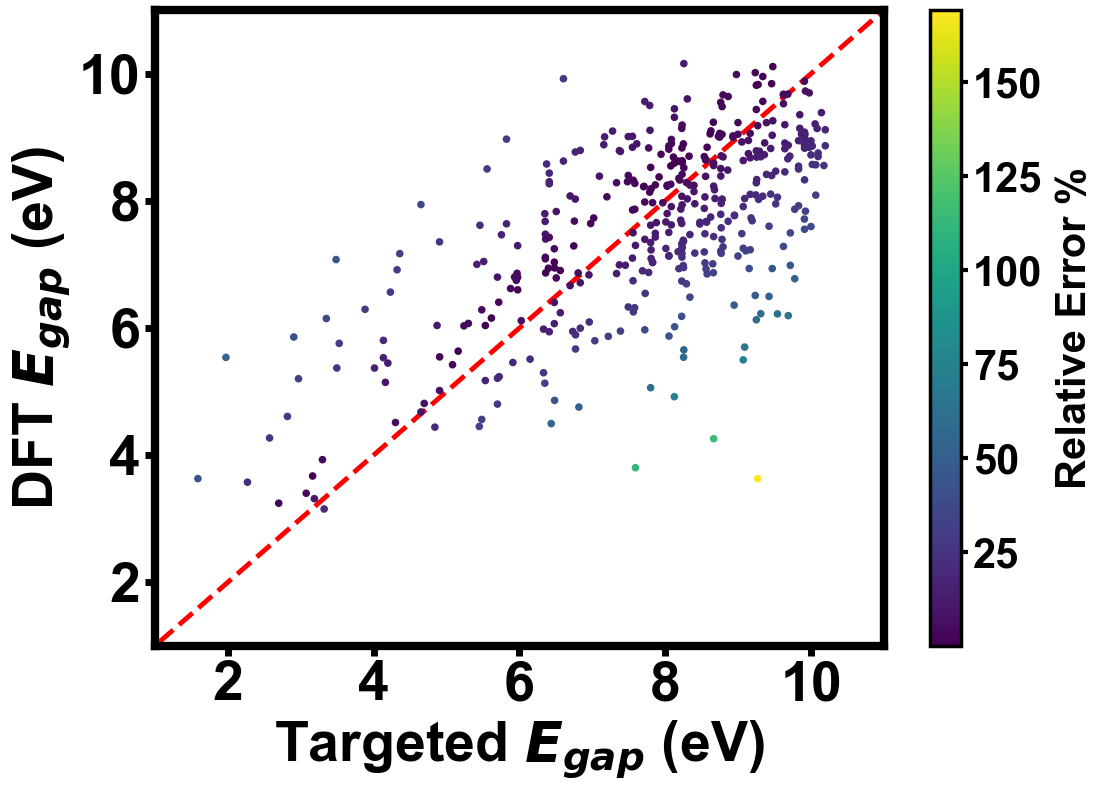

In [15]:
label_fontsize = 40
fig_size_x = 14*0.8
fig_size_y = 10*0.8
axis_size = 40
marker_size = 20

gap_range = (0, 11)
cMap = ListedColormap(['white', 'green', 'blue','red'])

Desired_gap = output["des_gap"]
DFT_gap = output["DFT_gap"]


col = output['RE_des_dft']
col_orig = np.copy(col)

mpl.rcParams['axes.linewidth'] = 2.5
fig, ax = plt.subplots(figsize = (fig_size_x, fig_size_y))
plt.scatter(Desired_gap-0.5, DFT_gap, s=marker_size, c=col_orig)

ax.tick_params(axis='both', which='major', labelsize=25)

plt.xlabel(r'Targeted $E_{gap}$ (eV)', fontsize=label_fontsize, 
           fontname='Arial', fontweight="bold", labelpad=5)
plt.ylabel(r'DFT $E_{gap}$ (eV)', fontsize=label_fontsize, 
           fontname='Arial', fontweight="bold", labelpad=5)

ax.tick_params(axis='both', which='major', labelsize=axis_size, width=5, length=7)
[i.set_linewidth(6) for i in ax.spines.values()]

plt.xlim(1, 11)
plt.ylim(1, 11)
# how many numbers on the axes, delta
ax.xaxis.set_major_locator(tk.MultipleLocator(7))
ax.yaxis.set_major_locator(tk.MultipleLocator(7))
ax.grid(False)

lims=[gap_range[0], gap_range[1]]
plt.plot(lims, lims, '--', linewidth=3.5, c='red', alpha=1, zorder=0)


cbar = plt.colorbar(shrink=1)

#cbar.ax.set_ticks(20)

plt.xticks ((2, 4, 6, 8, 10))
plt.yticks ((2, 4, 6, 8, 10))

#cbar.set_ticks(loacator)
cbar.ax.set_ylabel('Relative Error %', fontsize=30, fontname='Arial', fontweight='bold', labelpad=10)
cbar.ax.tick_params(axis='both', which='major', labelsize=30,  width=3, length=5)

#cbar.ax.yaxis.set_major_locator(tk.MultipleLocator(0.5))
#cbar.solids.set_edgecolor("face")
#plt.draw()
plt.tight_layout()
plt.savefig('DFT_Des.png', dpi = 500, bbox_inches='tight')

In [16]:
np.max(output['des_gap']-0.5)

10.1942

[0.36930456]
[0.3117506]
[0.31894484]


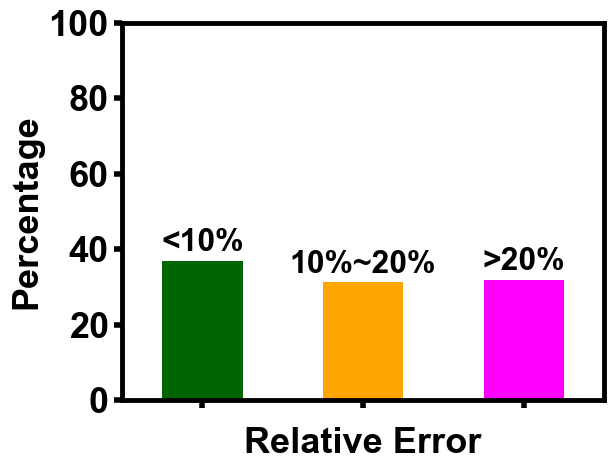

In [17]:
# make the numbers on axis bold
#rc('font', weight='bold')

re_less_10 = np.sum(output['RE_des_dft'].values <= 10)
print (re_less_10/output['RE_des_dft'].shape)

re_less_20_big_10 = np.sum( (output['RE_des_dft'].values > 10) &  (output['RE_des_dft'].values <= 20) )
print (re_less_20_big_10/output['RE_des_dft'].shape)

re_big_20 = np.sum(output['RE_des_dft'].values > 20)
print (re_big_20/output['RE_des_dft'].shape)
plt.close()

plt.bar(['<10%', '10% - 20%', '>20%'],
        [re_less_10/len(output), re_less_20_big_10/len(output), re_big_20/len(output)],
        color = ['green', 'blue', 'red'],
        alpha = 0.7)

plt.close()
plt.figure(figsize = (7.8*0.8, 6*0.8))
frequencies = [re_less_10/len(output)*100, re_less_20_big_10/len(output)*100, re_big_20/len(output)*100]
freq_series = pd.Series(frequencies)
ax = freq_series.plot(kind='bar', color = ['darkgreen', 'orange', 'magenta'])



rects = ax.patches
x_labels = [ ]
labels = ['<10%', '10%~20%', '>20%']

# define the width of the border
[i.set_linewidth(3.5) for i in ax.spines.values()]
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 2, height + 1, label, fontsize=23, fontweight='bold',
            ha='center', va='bottom')

ax.set_xticklabels(x_labels)
plt.ylim(0,100)
ax.tick_params(axis='both', which='major', labelsize=26, width=4, length=6)
#plt.yticks(fontsize = 22)
plt.ylabel("Percentage", fontsize=26, fontweight='bold', fontname='Arial')
plt.xlabel("Relative Error", fontsize=26, fontweight='bold', labelpad=10, fontname='Arial')
plt.ylim (0, 100)
plt.tight_layout()
plt.savefig('RE_dft_des.jpeg', dpi=500, bbox_inches='tight')

[0.47961631]
[0.32374101]
[0.19664269]


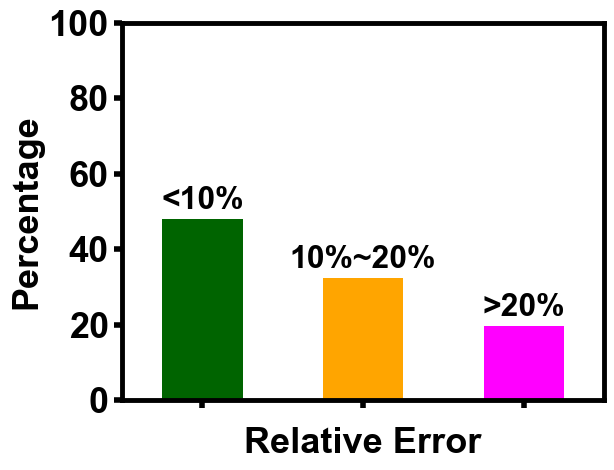

In [21]:
# make the numbers on axis bold
#rc('font', weight='bold')

re_less_10 = np.sum(output['RE_dft_des'].values <= 10)
print (re_less_10/output['RE_dft_des'].shape)

re_less_20_big_10 = np.sum( (output['RE_dft_des'].values > 10) &  (output['RE_dft_des'].values <= 20) )
print (re_less_20_big_10/output['RE_dft_des'].shape)

re_big_20 = np.sum(output['RE_dft_des'].values > 20)
print (re_big_20/output['RE_dft_des'].shape)
plt.close()

plt.bar(['<10%', '10% - 20%', '>20%'],
        [re_less_10/len(output), re_less_20_big_10/len(output), re_big_20/len(output)],
        color = ['green', 'blue', 'red'],
        alpha = 0.7)

plt.close()
plt.figure(figsize = (7.8*0.8, 6*0.8))
frequencies = [re_less_10/len(output)*100, re_less_20_big_10/len(output)*100, re_big_20/len(output)*100]
freq_series = pd.Series(frequencies)
ax = freq_series.plot(kind='bar', color = ['darkgreen', 'orange', 'magenta'])



rects = ax.patches
x_labels = [ ]
labels = ['<10%', '10%~20%', '>20%']

# define the width of the border
[i.set_linewidth(3.5) for i in ax.spines.values()]
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 2, height + 1, label, fontsize=23, fontweight='bold',
            ha='center', va='bottom')

ax.set_xticklabels(x_labels)
plt.ylim(0,100)
ax.tick_params(axis='both', which='major', labelsize=26, width=4, length=6)
#plt.yticks(fontsize = 22)
plt.ylabel("Percentage", fontsize=26, fontweight='bold', fontname='Arial')
plt.xlabel("Relative Error", fontsize=26, fontweight='bold', labelpad=10, fontname='Arial')
plt.ylim (0, 100)
plt.tight_layout()
plt.savefig('RE_dft_des.jpeg', dpi=500, bbox_inches='tight')

10.1568708
417


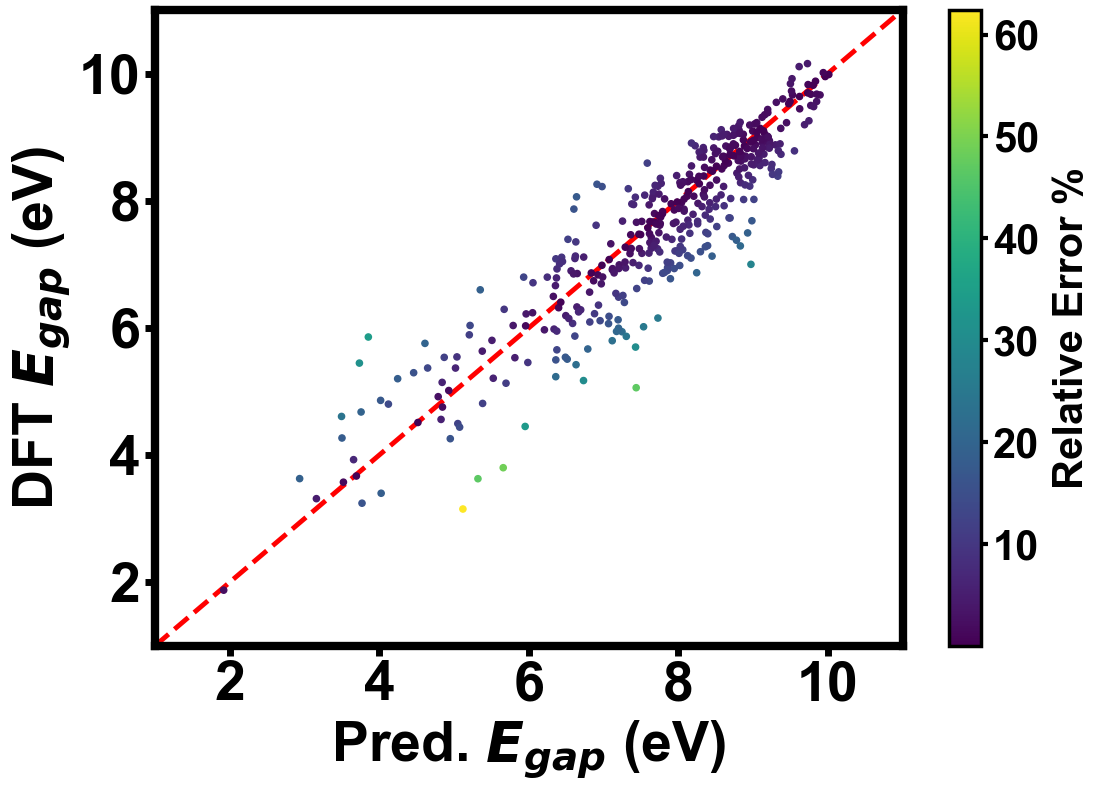

In [19]:
# make the numbers on axis bold

#rc('font', weight='bold')

gap_range = (1, 11)
pred_gap_range = (1, 11)
cMap = ListedColormap(['white', 'green', 'blue','red'])

predicted_gap = output["pred_gap"]
DFT_gap = output["DFT_gap"]
coll = output["RE_pred_dft"]


col = np.abs((DFT_gap-predicted_gap)/DFT_gap*100)
col_orig = np.copy(col)

#plt.figure(figsize = (8, 7))
#mpl.rcParams['axes.linewidth'] = 2.5
fig, ax = plt.subplots(figsize = (fig_size_x, fig_size_y))

plt.scatter(predicted_gap, DFT_gap, s=marker_size, c=coll)

ax.tick_params(axis='both', which='major', labelsize=40, width=5, length=7)

plt.xlabel(r'Pred. $E_{gap}$ (eV)', fontsize=label_fontsize, 
           fontname='Arial', fontweight="bold", labelpad=5)
plt.ylabel(r'DFT $E_{gap}$ (eV)', fontsize=label_fontsize, 
           fontname='Arial', fontweight="bold", labelpad=5)

plt.xlim(pred_gap_range)
plt.ylim(gap_range)
# how many numbers on the axes, delta
ax.xaxis.set_major_locator(tk.MultipleLocator(7))
ax.yaxis.set_major_locator(tk.MultipleLocator(7))
[i.set_linewidth(6) for i in ax.spines.values()]
lims=[gap_range[0], gap_range[1]]
plt.plot(lims, lims, '--', linewidth=3.5, c='red', alpha=1, zorder=0)


cbar = plt.colorbar(shrink=1)

plt.xticks ((2, 4, 6, 8, 10))
plt.yticks ((2, 4, 6, 8, 10))

#cbar.set_ticks(loacator)
cbar.ax.set_ylabel('Relative Error %', fontsize=30, fontname='Arial', fontweight='bold', labelpad=10)
cbar.ax.tick_params(axis='both', which='major', labelsize=30,  width=3, length=5)

#cbar.ax.yaxis.set_major_locator(tk.MultipleLocator(0.5))
#cbar.solids.set_edgecolor("face")
#plt.draw()
plt.tight_layout()
plt.savefig('DFT_pred.png', dpi = 500, bbox_inches='tight')

print (np.max(DFT_gap))
print (len(output["DFT_gap"]))

[0.7529976]
[0.1942446]
[0.05275779]


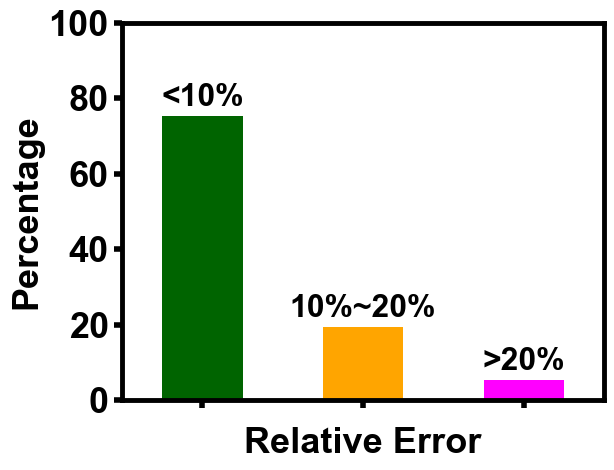

In [44]:
# make the numbers on axis bold
#rc('font', weight='bold')

re_less_10 = np.sum(output['RE_pred_dft'].values <= 10)
print (re_less_10/output['RE_pred_dft'].shape)

re_less_20_big_10 = np.sum( (output['RE_pred_dft'].values > 10) &  (output['RE_pred_dft'].values <= 20) )
print (re_less_20_big_10/output['RE_pred_dft'].shape)

re_big_20 = np.sum(output['RE_pred_dft'].values > 20)
print (re_big_20/output['RE_pred_dft'].shape)
plt.close()

plt.bar(['<10%', '10% - 20%', '>20%'],
        [re_less_10/len(output), re_less_20_big_10/len(output), re_big_20/len(output)],
        color = ['green', 'blue', 'red'],
        alpha = 0.7)

plt.close()
plt.figure(figsize = (7.8*0.8, 6*0.8))
frequencies = [re_less_10/len(output)*100, re_less_20_big_10/len(output)*100, re_big_20/len(output)*100]
freq_series = pd.Series(frequencies)
ax = freq_series.plot(kind='bar', color = ['darkgreen', 'orange', 'magenta'])

rects = ax.patches
x_labels = [ ]
labels = ['<10%', '10%~20%', '>20%']

# define the width of the border
[i.set_linewidth(3.5) for i in ax.spines.values()]
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 2, height + 1, label, fontsize=23, fontweight='bold',
            ha='center', va='bottom')

ax.set_xticklabels(x_labels)
plt.ylim(0,100)
ax.tick_params(axis='both', which='major', labelsize=26, width=4, length=6)
#plt.yticks(fontsize = 22)
plt.ylabel("Percentage", fontsize=26, fontweight='bold', fontname='Arial')
plt.xlabel("Relative Error", fontsize=26, fontweight='bold', labelpad=10, fontname='Arial')
plt.ylim (0, 100)
plt.tight_layout()
plt.savefig('RE_dft_pred.jpeg', dpi=500, bbox_inches='tight')

[0.76019185]
[0.18944844]
[0.05035971]


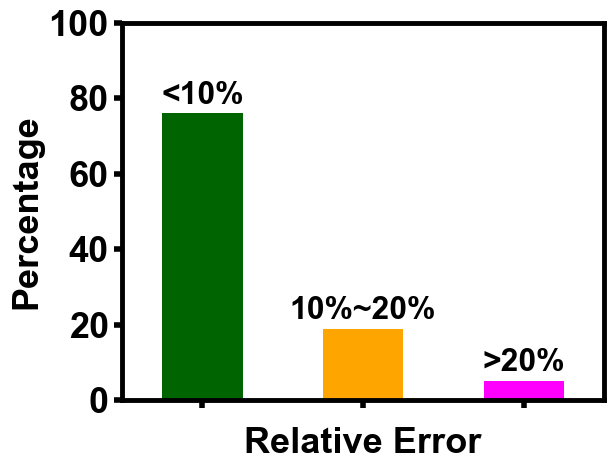

In [45]:
# make the numbers on axis bold
#rc('font', weight='bold')

re_less_10 = np.sum(output['RE_dft_pred'].values <= 10)
print (re_less_10/output['RE_dft_pred'].shape)

re_less_20_big_10 = np.sum( (output['RE_dft_pred'].values > 10) &  (output['RE_dft_pred'].values <= 20) )
print (re_less_20_big_10/output['RE_dft_pred'].shape)

re_big_20 = np.sum(output['RE_dft_pred'].values > 20)
print (re_big_20/output['RE_dft_pred'].shape)
plt.close()

plt.bar(['<10%', '10% - 20%', '>20%'],
        [re_less_10/len(output), re_less_20_big_10/len(output), re_big_20/len(output)],
        color = ['green', 'blue', 'red'],
        alpha = 0.7)

plt.close()
plt.figure(figsize = (7.8*0.8, 6*0.8))
frequencies = [re_less_10/len(output)*100, re_less_20_big_10/len(output)*100, re_big_20/len(output)*100]
freq_series = pd.Series(frequencies)
ax = freq_series.plot(kind='bar', color = ['darkgreen', 'orange', 'magenta'])

rects = ax.patches
x_labels = [ ]
labels = ['<10%', '10%~20%', '>20%']

# define the width of the border
[i.set_linewidth(3.5) for i in ax.spines.values()]
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 2, height + 1, label, fontsize=23, fontweight='bold',
            ha='center', va='bottom')

ax.set_xticklabels(x_labels)
plt.ylim(0,100)
ax.tick_params(axis='both', which='major', labelsize=26, width=4, length=6)
#plt.yticks(fontsize = 22)
plt.ylabel("Percentage", fontsize=26, fontweight='bold', fontname='Arial')
plt.xlabel("Relative Error", fontsize=26, fontweight='bold', labelpad=10, fontname='Arial')
plt.ylim (0, 100)
plt.tight_layout()
plt.savefig('RE_dft_pred.jpeg', dpi=500, bbox_inches='tight')

In [85]:
print (r2_score(output['pred_gap'], output['DFT_gap']))
print (mean_absolute_error(output['pred_gap'], output['DFT_gap']))

0.8122383492449002
0.47645813237410084


In [97]:
print (r2_score(output['des_gap']-0.5, output['pred_gap'], ))
print (mean_absolute_error( output['des_gap']-0.5, output['pred_gap'],))

0.5262941147755467
0.950478011031175


In [98]:
print (r2_score(output['des_gap']-0.5, output['DFT_gap']))
print (mean_absolute_error(output['des_gap']-0.5, output['DFT_gap']))

0.42460102593487836
1.0566883376498801


In [48]:
# replacing TDDFT results
dft_tddft_merged = pd.merge(output, output_tddft, on='SMILES') 

In [49]:
output_TDDFT_rep = output.copy()
for smiles, tddft, dft, des in zip(dft_tddft_merged['SMILES'], dft_tddft_merged['TDDFT_gap'], dft_tddft_merged['DFT_gap'], dft_tddft_merged['des_gap_x']):
    #print (smiles, tddft, dft)
    if abs(tddft-des)<abs((dft-des)):
        print (smiles, tddft, dft, des)
        output_TDDFT_rep.loc[output_TDDFT_rep['SMILES']==smiles] = \
            output_TDDFT_rep.loc[output_TDDFT_rep['SMILES']==smiles].replace(
                {float(output_TDDFT_rep['DFT_gap'].loc[output_TDDFT_rep['SMILES']==smiles]): \
                float(dft_tddft_merged['TDDFT_gap'].loc[dft_tddft_merged['SMILES']==smiles])})

C=CCC(C)CCC(CO)CCCCO 6.888840037305532 7.465084999999999 6.2531
CC1CC(C)(C)OO1 6.831696080604862 7.6376598 6.3221
CCN1CC(OC(C)=O)CC1CN 5.767457915574765 6.2848258 5.983
CCN=CCC(=CCC=NN)CCO 5.656435371127749 5.8574718 3.4055
CC=CC1CC=C1C1C=CC=C1 5.211800965180631 5.369145 4.5117
CCCCOCC1CC1C=CCOC 6.450464255187535 6.7486546 6.4569
CCOC(=O)C=CC(C)C(=O)O 5.638747955958494 5.6350844 5.6595
CCCC1CCCC1CCC(C)OC 7.100544791177538 8.96899 6.3221
CCNC1NC1C1CCC=CCNCC1 5.737253252747268 6.1481814 3.8512


/tmp/ipykernel_2738128/3103680801.py:8: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  {float(output_TDDFT_rep['DFT_gap'].loc[output_TDDFT_rep['SMILES']==smiles]): \
/tmp/ipykernel_2738128/3103680801.py:9: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(dft_tddft_merged['TDDFT_gap'].loc[dft_tddft_merged['SMILES']==smiles])})


In [50]:
output_TDDFT_rep

,SMILES,des_gap,pred_gap,Err_pred_des,AE,DFT_gap,RE_dft_des,RE_des_dft,RE_dft_pred,RE_pred_dft
0,C=C(C)CC(CCCC)C(CC)CCO,8.5081,7.370851,0.133667,1.137249,7.250047,14.786533,17.352343,1.638937,1.666246
1,COCCCOCCCOC1=CCO1,8.7283,6.735646,0.228298,1.992654,7.114219,18.492499,22.688095,5.620444,5.321360
2,CC1CCCN(C)C(C)CC1,9.6055,7.982237,0.168993,1.623263,7.212211,24.915817,33.183842,9.646745,10.676699
3,CCCCCC(C)OCC(=O)CCC,9.4440,6.933292,0.265852,2.510708,6.358864,32.667681,48.517089,8.285066,9.033497
4,C=C1CC1C(O)C(O)CCCO,6.8973,7.597714,0.101549,0.700414,6.939195,0.607406,0.603739,8.667330,9.489846
...,...,...,...,...,...,...,...,...,...,...
412,CCCCCC(C)CCC(N)CCCN,8.3050,7.331760,0.117187,0.973240,8.189409,1.391822,1.411467,11.697734,10.472669
413,CN1CCCCCCCCCCCOC1,8.9736,7.705277,0.141339,1.268323,7.634393,14.923850,17.541755,0.919929,0.928471
414,CC=CCCC=C1CCCCCCCCC1,7.3339,6.057264,0.174073,1.276636,6.710819,8.495905,9.284727,10.789599,9.738819
415,CCCCNCCOCCCC(C)COCC,8.8376,8.031061,0.091262,0.806539,8.245210,6.703062,7.184654,2.666512,2.597256


In [81]:
print (r2_score(output_TDDFT_rep['des_gap'], output_TDDFT_rep['DFT_gap']))
print (pearsonr(output_TDDFT_rep['des_gap'], output_TDDFT_rep['DFT_gap'])[0])
print (mean_absolute_error(output_TDDFT_rep['des_gap'], output_TDDFT_rep['DFT_gap']+0.5))

0.28626398018352484
0.6868648720482224
1.0451011501795309


In [79]:
print (r2_score(output_TDDFT_rep['pred_gap'], output_TDDFT_rep['DFT_gap']))
print (mean_absolute_error(output_TDDFT_rep['pred_gap'], output_TDDFT_rep['DFT_gap']))

0.8043434598288804
0.4756651380327801
